In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('./Data/hcm_aqi_dataset_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         26880 non-null  object 
 1   PM10         26880 non-null  float64
 2   PM2.5        26880 non-null  float64
 3   CO           26880 non-null  float64
 4   NO2          26880 non-null  float64
 5   O3           26880 non-null  float64
 6   SO2          26880 non-null  float64
 7   AQI          26880 non-null  int64  
 8   UV           26880 non-null  float64
 9   Temperature  26880 non-null  float64
 10  Humidity     26880 non-null  int64  
 11  Rain         26880 non-null  float64
 12  Wind_Speed   26880 non-null  float64
 13  Wind_Dir     26880 non-null  int64  
 14  month        26880 non-null  int64  
 15  day          26880 non-null  int64  
 16  hour         26880 non-null  int64  
 17  dayofweek    26880 non-null  int64  
 18  is_weekend   26880 non-null  int64  
dtypes: f

In [66]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26880 entries, 0 to 26879
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         26880 non-null  datetime64[ns]
 1   PM10         26880 non-null  float64       
 2   PM2.5        26880 non-null  float64       
 3   CO           26880 non-null  float64       
 4   NO2          26880 non-null  float64       
 5   O3           26880 non-null  float64       
 6   SO2          26880 non-null  float64       
 7   AQI          26880 non-null  int64         
 8   UV           26880 non-null  float64       
 9   Temperature  26880 non-null  float64       
 10  Humidity     26880 non-null  int64         
 11  Rain         26880 non-null  float64       
 12  Wind_Speed   26880 non-null  float64       
 13  Wind_Dir     26880 non-null  int64         
 14  month        26880 non-null  int64         
 15  day          26880 non-null  int64         
 16  hour

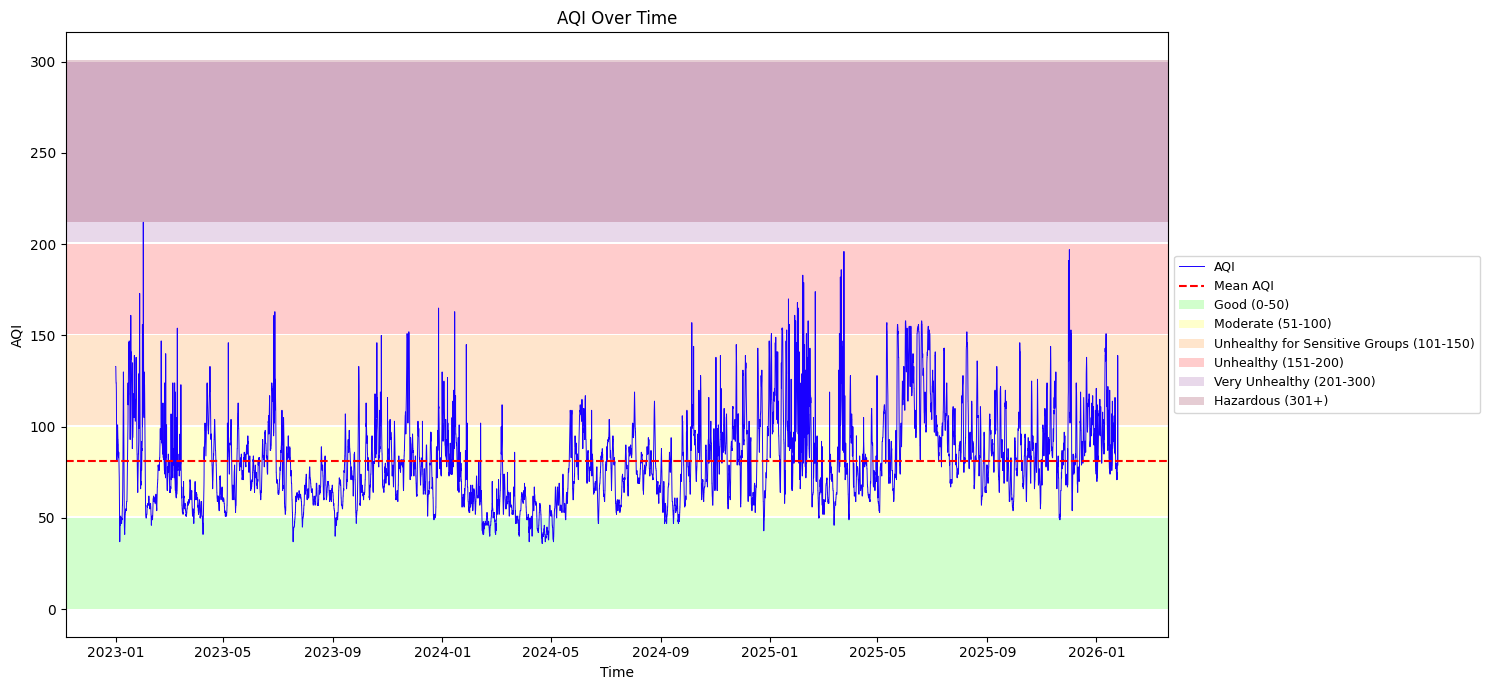

In [67]:
plt.figure(figsize=(15,7))
plt.plot(df['time'], df['AQI'], color="#1900FF", label='AQI', linewidth=0.7)
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('AQI Over Time')
# Vẽ đường trung bình AQI
plt.axhline(df['AQI'].mean(), color="#FF0000", linestyle='--', label='Mean AQI')

plt.legend()
# Vẽ các vùng màu theo chuẩn US EPA AQI
plt.axhspan(0, 50, facecolor="#19fc00", alpha=0.2, label='Good (0-50)')
plt.axhspan(51, 100, facecolor='#ffff00', alpha=0.2, label='Moderate (51-100)')
plt.axhspan(101, 150, facecolor='#ff7e00', alpha=0.2, label='Unhealthy for Sensitive Groups (101-150)')
plt.axhspan(151, 200, facecolor='#ff0000', alpha=0.2, label='Unhealthy (151-200)')
plt.axhspan(201, 300, facecolor='#8f3f97', alpha=0.2, label='Very Unhealthy (201-300)')
plt.axhspan(301, df['AQI'].max(), facecolor='#7e0023', alpha=0.2, label='Hazardous (301+)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout()
plt.show()

# Tần suất của các mức độ ô nhiễm

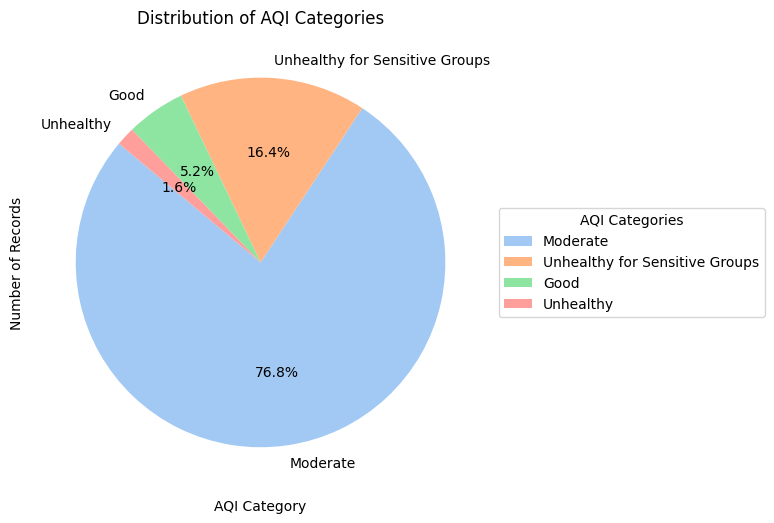

In [68]:
df['category'] = pd.cut(df['AQI'], bins = [0,50,100,150,200,300,500], labels=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
count_category = df['category'].value_counts()
count_category = count_category[count_category.values >50]
plt.figure(figsize=(10,6))
plt.pie(count_category.values, labels=count_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops={'fontsize': 10})
plt.title('Distribution of AQI Categories') 
plt.xlabel('AQI Category')
plt.ylabel('Number of Records')
plt.legend(title='AQI Categories', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 16% thời gian ở mức không an toàn cho nhóm người nhạy cảm
Trẻ em: Phổi của trẻ vẫn đang trong quá trình phát triển. Trẻ cũng thường vận động ngoài trời nhiều hơn và có nhịp thở nhanh hơn người lớn, dẫn đến việc hít vào nhiều chất ô nhiễm hơn so với trọng lượng cơ thể.

Người già: Hệ thống miễn dịch và khả năng lọc bụi của phổi suy giảm theo độ tuổi. Họ cũng thường có các bệnh lý nền tiềm ẩn.

Người có bệnh về hô hấp: Những người bị hen suyễn (asthma), viêm phế quản mãn tính hoặc bệnh phổi tắc nghẽn mãn tính (COPD). Khói bụi có thể kích phát các cơn hen cấp tính.

Người có bệnh tim mạch: Ô nhiễm không khí (đặc biệt là bụi mịn PM2.5) có thể gây áp lực lên hệ thống tim mạch, tăng nguy cơ đau tim hoặc đột quỵ.

Người làm việc hoặc vận động cường độ cao ngoài trời: Công nhân xây dựng, vận động viên... do hít thở sâu và mạnh, lượng chất độc hại đi vào phổi sẽ lớn hơn bình thường.

In [69]:
count_category = df['category'].value_counts()
count_category

category
Moderate                          20650
Unhealthy for Sensitive Groups     4400
Good                               1385
Unhealthy                           441
Very Unhealthy                        4
Hazardous                             0
Name: count, dtype: int64

# TRUNG bình theo từng năm

In [71]:
df['year'] = df['time'].dt.year
mean_aqi_year = df.groupby(['year'])[['AQI']].mean().rename(columns = {'AQI':'avg_AQI'}).round(2)
mean_aqi_year

,avg_AQI
year,
2023,76.73
2024,73.01
2025,93.40
2026,95.15


C:\Users\dodac\AppData\Local\Temp\ipykernel_1388\4151014771.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




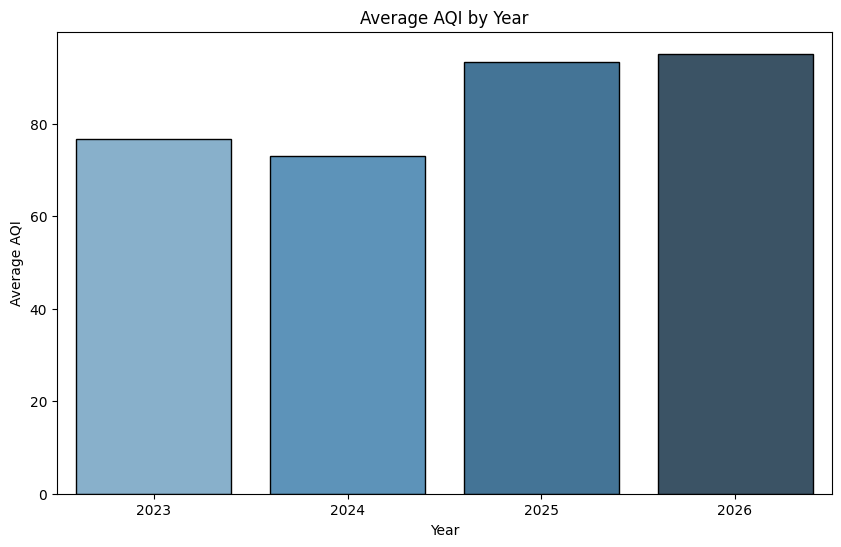

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x=mean_aqi_year.index, y=mean_aqi_year['avg_AQI'], palette='Blues_d', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI by Year')
plt.show()

# Mức độ ô nhiễm theo tháng và giờ trong ngày

In [74]:
df.columns

Index(['time', 'PM10', 'PM2.5', 'CO', 'NO2', 'O3', 'SO2', 'AQI', 'UV',
       'Temperature', 'Humidity', 'Rain', 'Wind_Speed', 'Wind_Dir', 'month',
       'day', 'hour', 'dayofweek', 'is_weekend', 'category', 'year'],
      dtype='object')

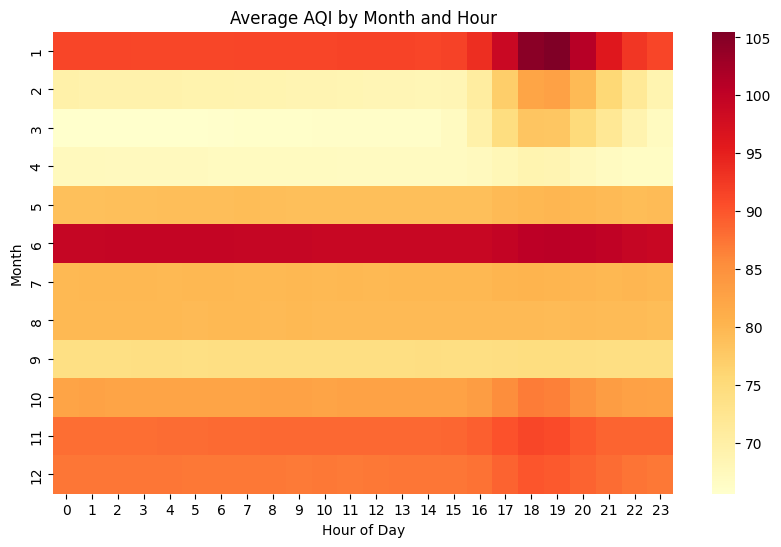

In [75]:
pivot_table = df.pivot_table(index='month', columns='hour', values='AQI', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False)
plt.title('Average AQI by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()

Khung giờ từ 17-21h có màu đậm hơn, tháng 6 là tháng có AQI cao nhất

C:\Users\dodac\AppData\Local\Temp\ipykernel_1388\409072149.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




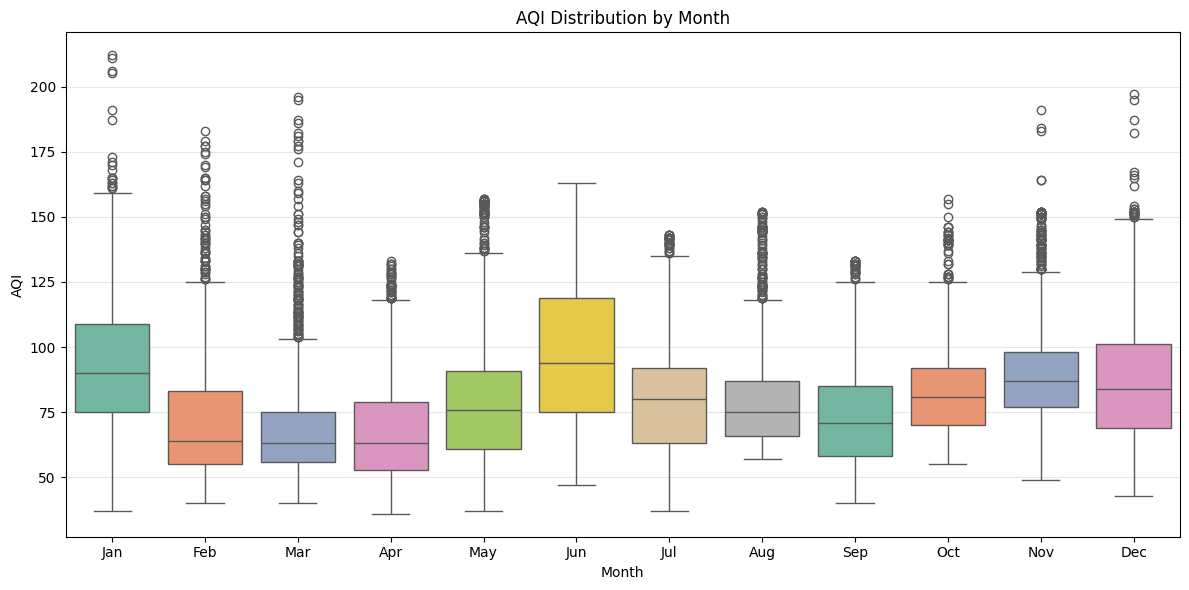

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='AQI', palette='Set2')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('AQI Distribution by Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\dodac\AppData\Local\Temp\ipykernel_1388\1660596288.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




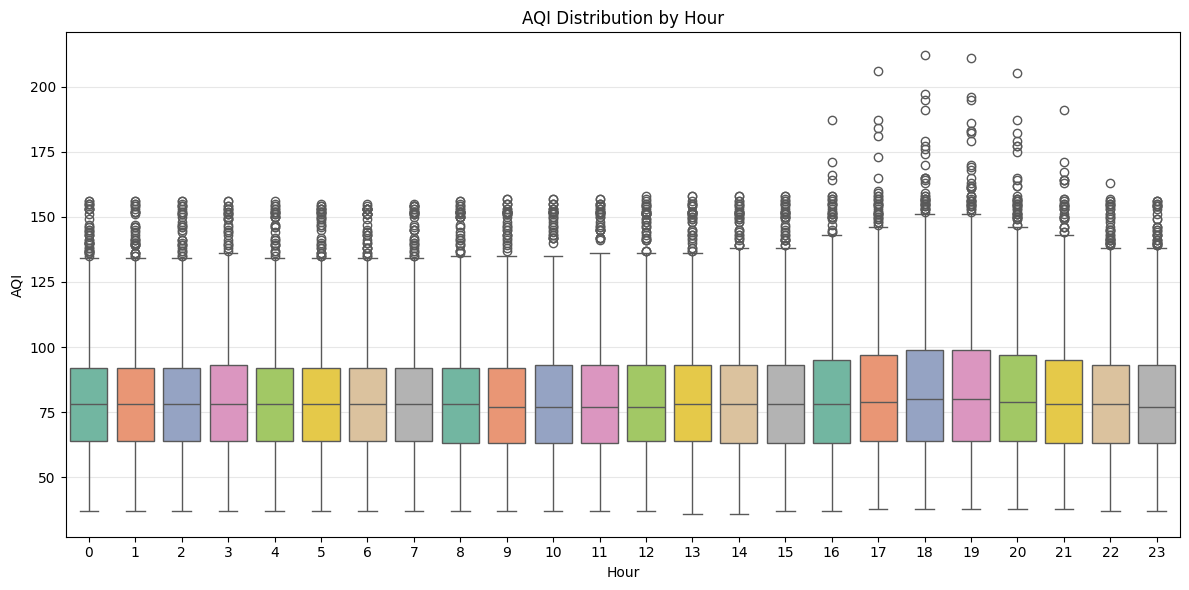

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='AQI', palette='Set2')
plt.xlabel('Hour')
plt.ylabel('AQI')
plt.title('AQI Distribution by Hour')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\dodac\AppData\Local\Temp\ipykernel_1388\2435063605.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




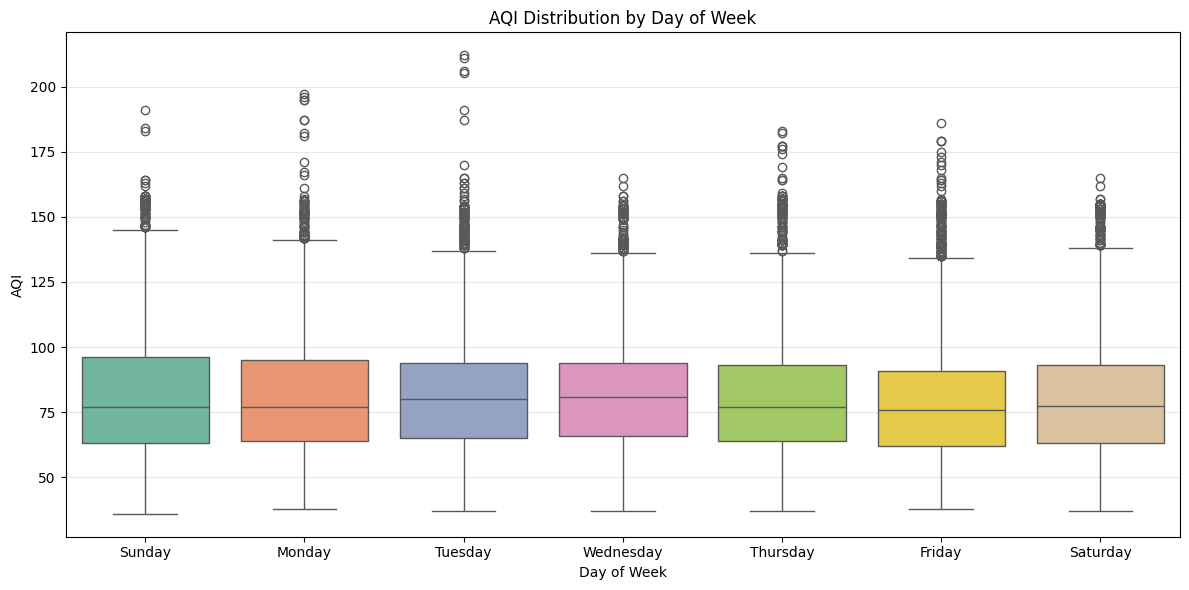

In [82]:
plt.figure(figsize=(12, 6))
df['dayofweek_name'] = df['dayofweek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
sns.boxplot(data=df, x='dayofweek_name', y='AQI', palette='Set2')
plt.xlabel('Day of Week')
plt.ylabel('AQI')
plt.title('AQI Distribution by Day of Week')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


=== Seasonal Analysis ===
            PM10                 PM2.5                     CO              \
            mean        std       mean        std        mean         std   
month                                                                       
1      39.032301  18.103972  31.029345  14.597825  731.871795  478.139126   
2      27.317598  11.750818  20.452647   9.860457  485.147059  313.063389   
3      27.389247  10.309835  19.728719   8.790148  391.994624  213.822998   
4      27.614676  13.774376  20.054259  10.565732  384.827778  216.240320   
5      33.876971  16.469390  25.860887  15.098949  533.575269  366.918228   
6      44.488519  19.655434  34.791574  18.878998  650.977315  461.014722   
7      34.215502  14.103976  25.957437  12.457513  515.697581  363.326469   
8      33.208020  12.933208  25.643414  11.560441  588.799283  482.552709   
9      30.095602  14.458106  23.257870  12.139981  629.442593  519.138429   
10     35.831048  15.475661  27.282258  11.771142

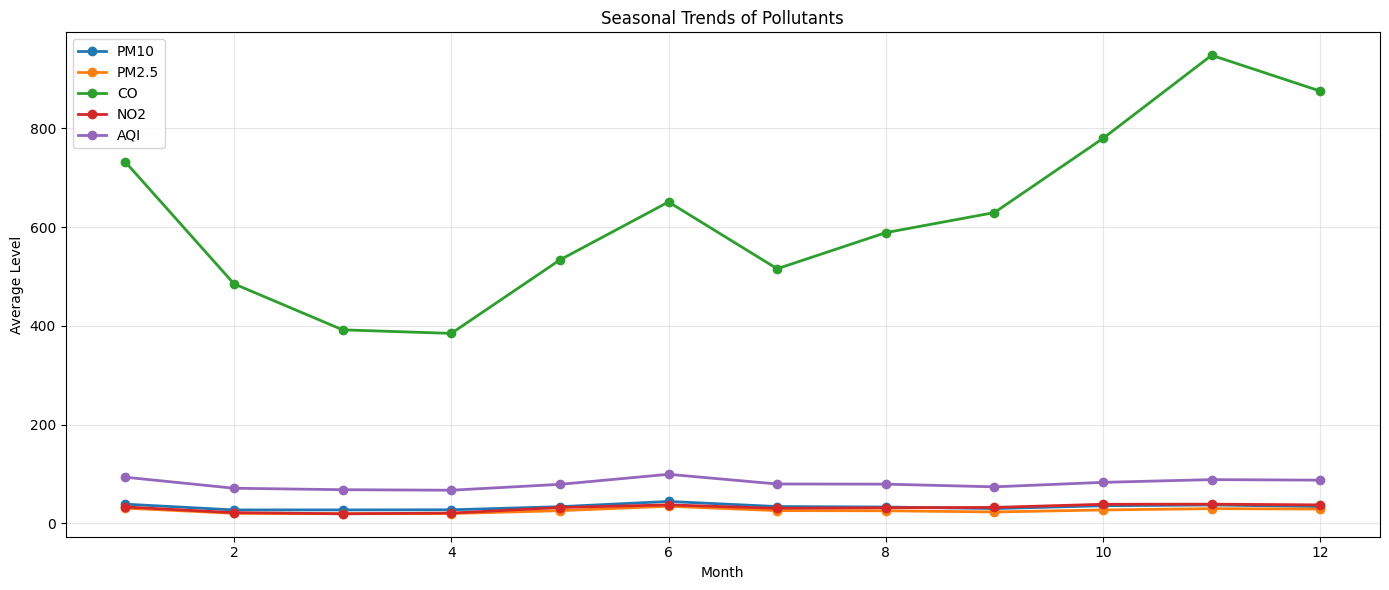

In [83]:
# 3. SEASONAL ANALYSIS
seasonal_analysis = df.groupby('month')[['PM10', 'PM2.5', 'CO', 'NO2', 'O3', 'SO2', 'AQI']].agg(['mean', 'std'])
print("\n=== Seasonal Analysis ===")
print(seasonal_analysis)

plt.figure(figsize=(14, 6))
for pollutant in ['PM10', 'PM2.5', 'CO', 'NO2', 'AQI']:
    monthly_mean = df.groupby('month')[pollutant].mean()
    plt.plot(monthly_mean.index, monthly_mean.values, marker='o', label=pollutant, linewidth=2)

plt.xlabel('Month')
plt.ylabel('Average Level')
plt.title('Seasonal Trends of Pollutants')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== Hourly AQI Analysis ===
           mean        std  min  max
hour                                
0     80.557143  22.743673   37  156
1     80.577679  22.646430   37  156
2     80.573214  22.642459   37  156
3     80.570536  22.618933   37  156
4     80.574107  22.646127   37  156
5     80.562500  22.711377   37  155
6     80.572321  22.777318   37  155
7     80.560714  22.901582   37  155
8     80.558929  23.033800   37  156
9     80.557143  23.108524   37  157
10    80.533929  23.179154   37  157
11    80.527679  23.242536   37  157
12    80.536607  23.270613   37  158
13    80.551786  23.297067   36  158
14    80.529464  23.326011   36  158
15    80.635714  23.396710   37  158
16    81.407143  24.151191   37  187
17    83.408929  26.119624   38  206
18    85.164286  27.972982   38  212
19    85.199107  28.260068   38  211
20    83.763393  26.917746   38  205
21    82.326786  25.115220   38  191
22    81.229464  23.589997   37  163
23    80.661607  22.861567   37  156


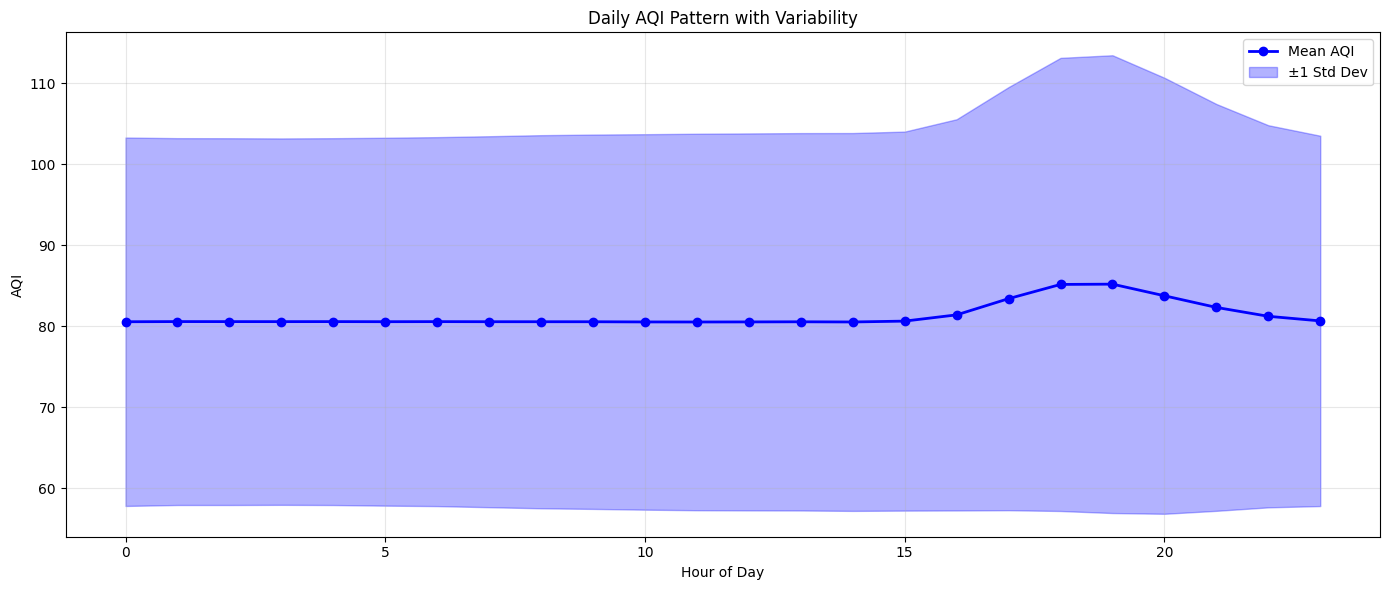

In [ ]:

hourly_aqi = df.groupby('hour')['AQI'].agg(['mean', 'std', 'min', 'max'])
print("\n=== Hourly AQI Analysis ===")
print(hourly_aqi)

plt.figure(figsize=(14, 6))
plt.plot(hourly_aqi.index, hourly_aqi['mean'], marker='o', linewidth=2, label='Mean AQI', color='blue')
plt.fill_between(hourly_aqi.index, 
                 hourly_aqi['mean'] - hourly_aqi['std'], 
                 hourly_aqi['mean'] + hourly_aqi['std'], 
                 alpha=0.3, color='blue', label='±1 Std Dev')
plt.xlabel('Hour of Day')
plt.ylabel('AQI')
plt.title('Daily AQI Pattern with Variability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

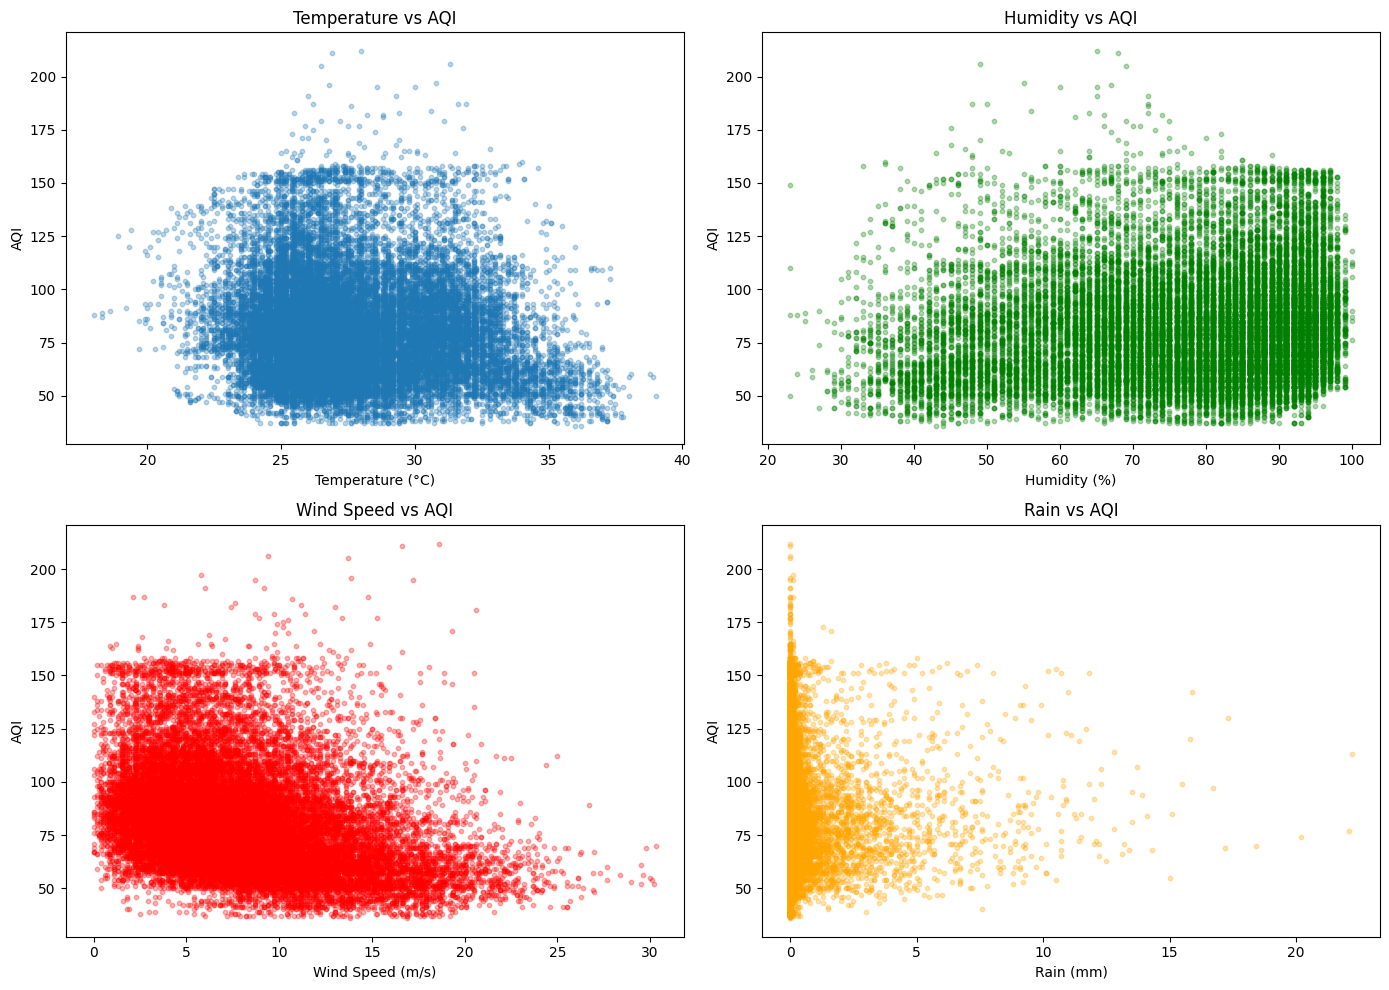

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs AQI
axes[0, 0].scatter(df['Temperature'], df['AQI'], alpha=0.3, s=10)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('AQI')
axes[0, 0].set_title('Temperature vs AQI')

# Humidity vs AQI
axes[0, 1].scatter(df['Humidity'], df['AQI'], alpha=0.3, s=10, color='green')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('AQI')
axes[0, 1].set_title('Humidity vs AQI')

# Wind Speed vs AQI
axes[1, 0].scatter(df['Wind_Speed'], df['AQI'], alpha=0.3, s=10, color='red')
axes[1, 0].set_xlabel('Wind Speed (m/s)')
axes[1, 0].set_ylabel('AQI')
axes[1, 0].set_title('Wind Speed vs AQI')

# Rain vs AQI
axes[1, 1].scatter(df['Rain'], df['AQI'], alpha=0.3, s=10, color='orange')
axes[1, 1].set_xlabel('Rain (mm)')
axes[1, 1].set_ylabel('AQI')
axes[1, 1].set_title('Rain vs AQI')

plt.tight_layout()
plt.show()

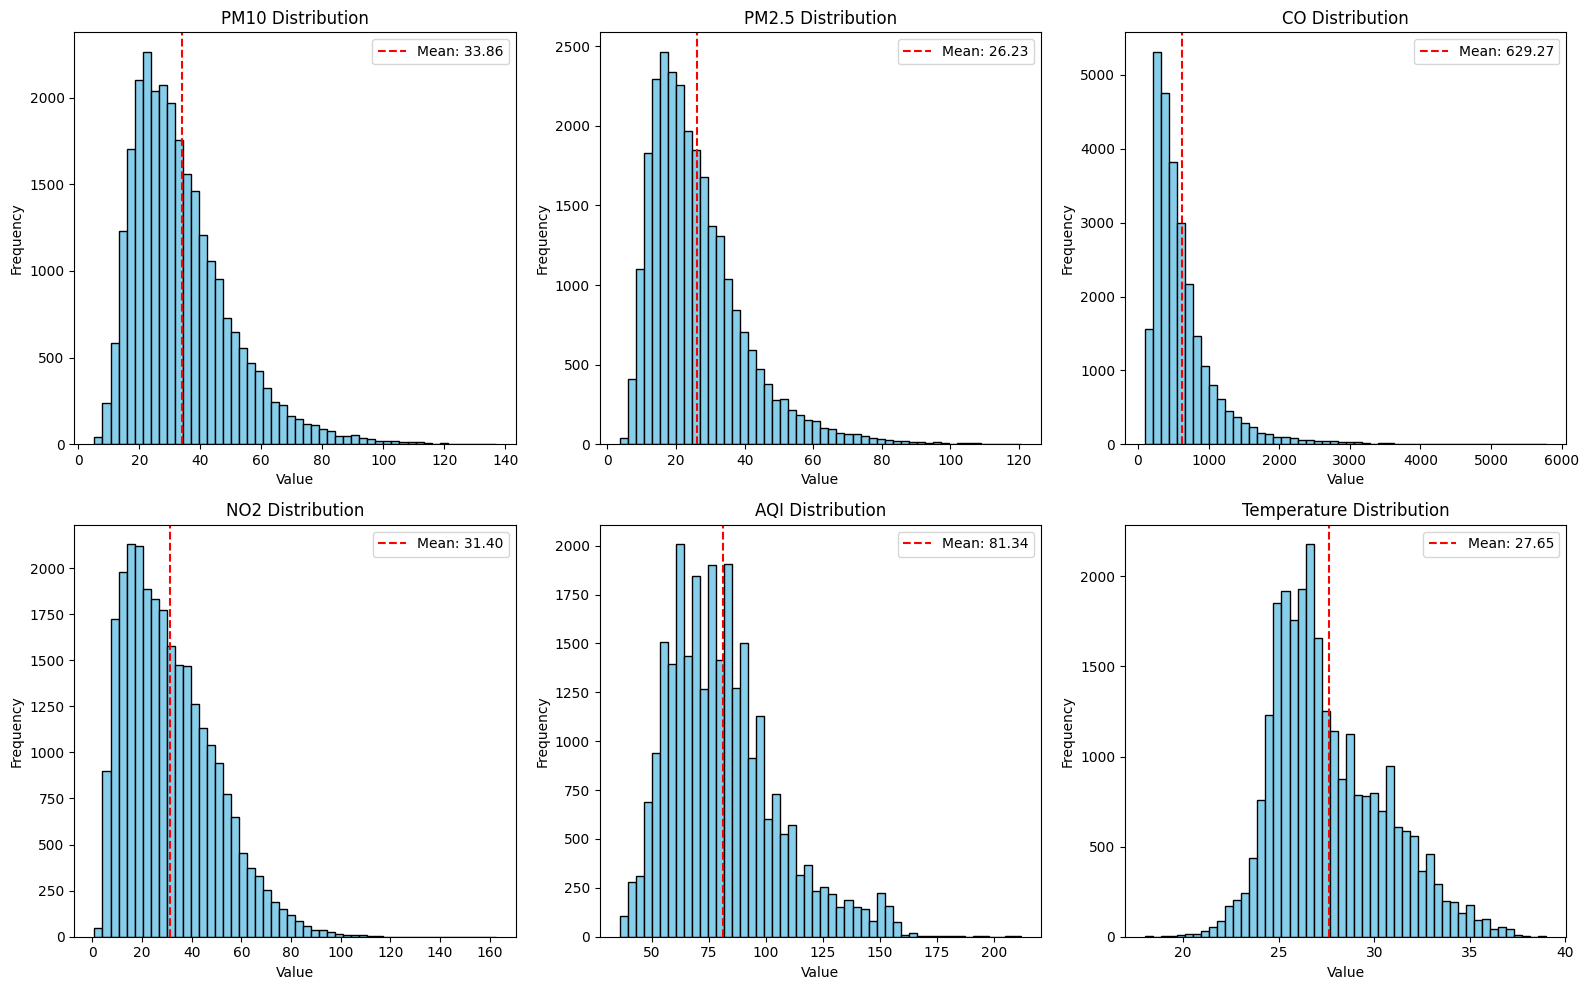

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(['PM10', 'PM2.5', 'CO', 'NO2', 'AQI', 'Temperature']):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()